In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
import missingno as msno 

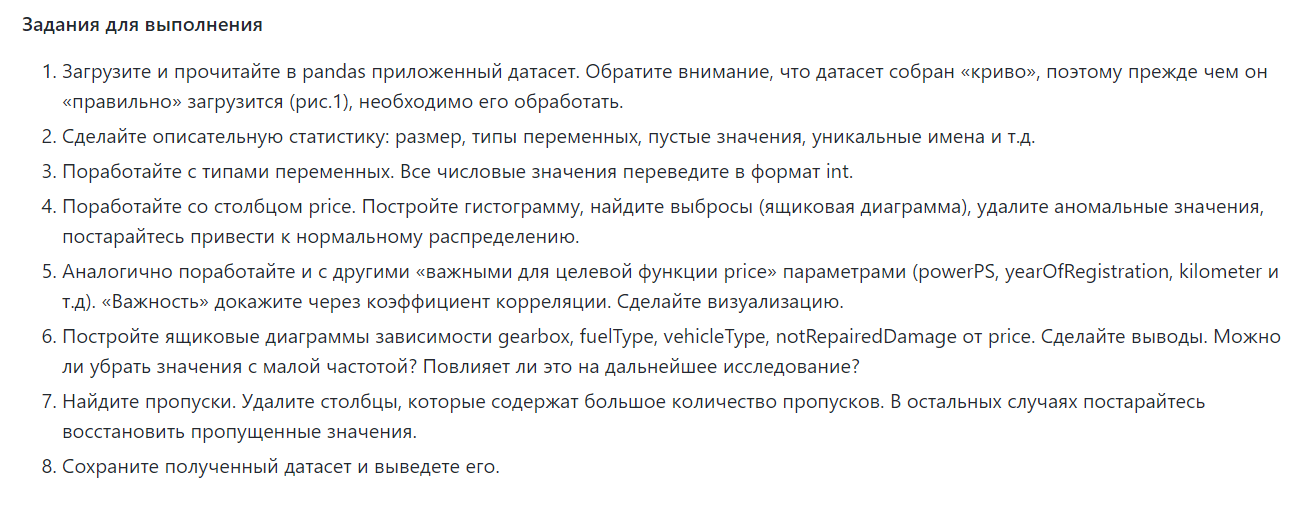

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары'

/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары


In [ ]:
df = pd.read_csv('cars_sampled.csv')
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [ ]:
df.shape

(50001, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [ ]:
print("-"*30)
print("Missing values of each column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("Total rows with missing values / Total number of rows =",(df.shape[0] - df.dropna().shape[0])/len(df))

------------------------------
Missing values of each column
------------------------------
dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64
------------------------------
Total rows with missing values / Total number of rows = 0.2978740425191496


In [ ]:
df.vehicleType.unique()

array(['limousine', 'suv', 'bus', 'small car', 'station wagon', 'coupe',
       nan, 'others', 'cabrio'], dtype=object)

In [ ]:
df.gearbox.unique()

array(['manual', 'automatic', nan], dtype=object)

In [ ]:
df.model.unique();

In [ ]:
df.fuelType.unique()

array(['diesel', 'petrol', nan, 'cng', 'lpg', 'hybrid', 'electro',
       'other'], dtype=object)

In [ ]:
df.notRepairedDamage.unique()

array([nan, 'no', 'yes'], dtype=object)

### Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

In [ ]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [ ]:
df['price'].value_counts()

0         1451
500        742
1500       705
1000       647
2500       594
          ... 
103990       1
370000       1
2151         1
225000       1
175000       1
Name: price, Length: 2393, dtype: int64

In [ ]:
df.price[df.price < 25000].value_counts()

0        1451
500       742
1500      705
1000      647
2500      594
         ... 
13498       1
10760       1
10399       1
15650       1
24301       1
Name: price, Length: 1870, dtype: int64

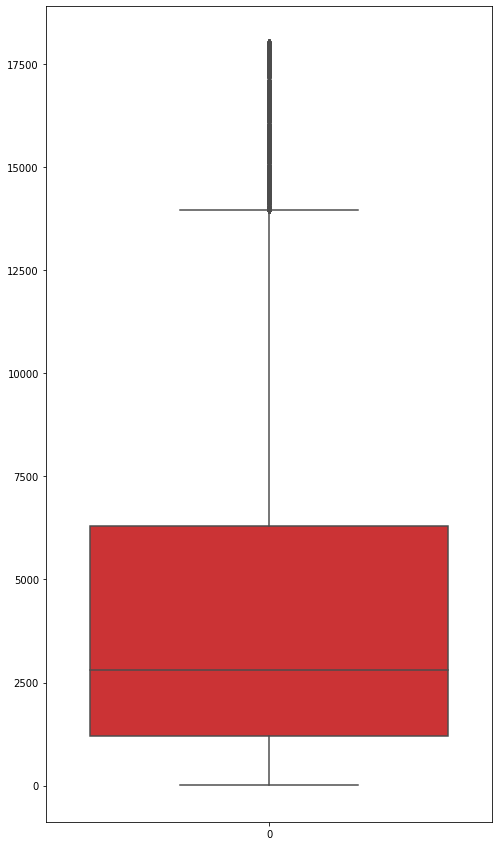

In [ ]:
plt.figure(figsize=(8, 15))
sns.boxplot(data=df.price[(df.price < 18000) & (df.price > 20)], palette='Set1');

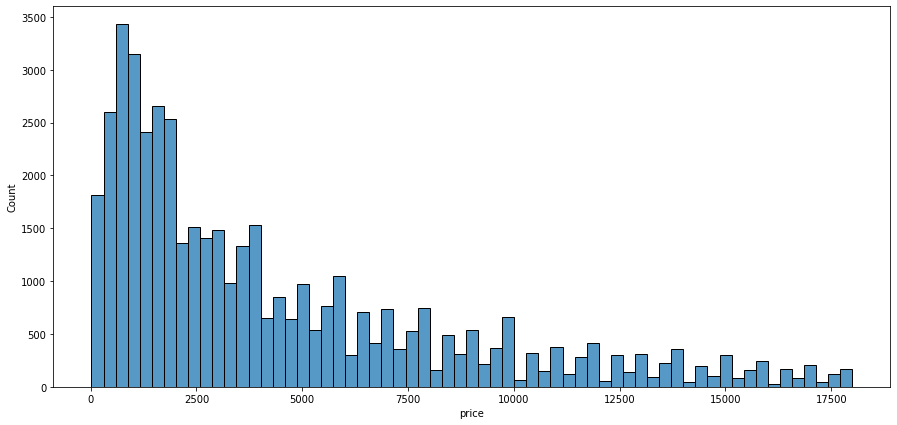

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=df.price[(df.price < 18000) & (df.price > 20)])

In [ ]:
df = df[(df.price < 18000) & (df.price > 20)]

In [ ]:
df.price

0         4450
1        13299
2         3200
3         4500
5          988
         ...  
49992      790
49993      830
49995     2290
49999      100
50000     1100
Name: price, Length: 45379, dtype: int64

### Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

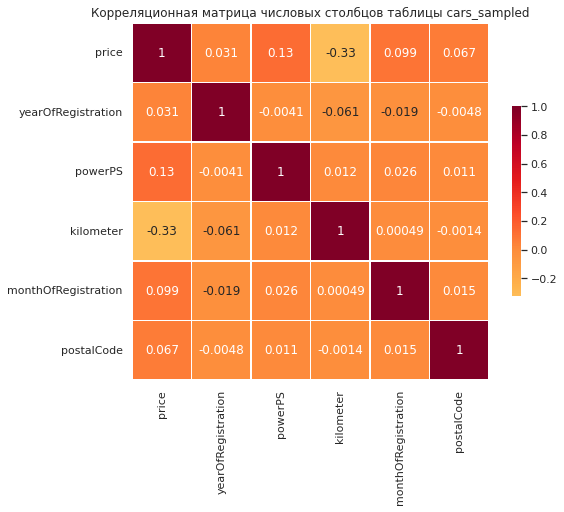

In [ ]:
sns.set_theme(style="white")

corr = df.corr()

fig, ax = plt.subplots(figsize=(8, 7))

sns.heatmap(corr, cmap='YlOrRd', center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})\
            .set_title('Корреляционная матрица числовых столбцов таблицы cars_sampled');

### Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

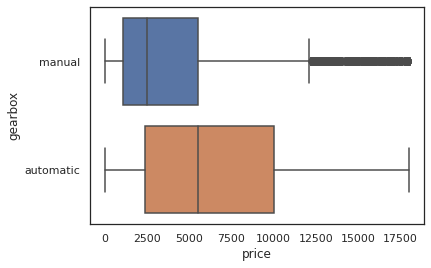

In [ ]:
sns.boxplot(
    data=df,
    x='price',
    y='gearbox'
);

# df[['price', 'gearbox', 'fuelType', 'vehicleType', 'notRepairedDamage']].boxplot(by='price', meanline=True, showmeans=True, showcaps=True, 
#            showbox=True, showfliers=False)


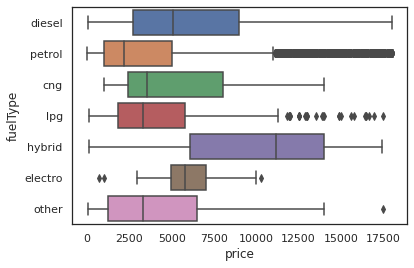

In [ ]:
sns.boxplot(
    data=df,
    x='price',
    y='fuelType'
);

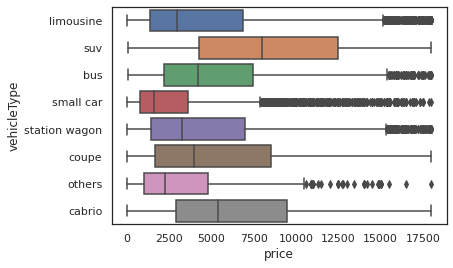

In [ ]:
sns.boxplot(
    data=df,
    x='price',
    y='vehicleType'
);

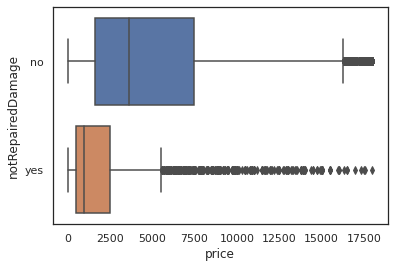

In [ ]:
sns.boxplot(
    data=df,
    x='price',
    y='notRepairedDamage'
);

### Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

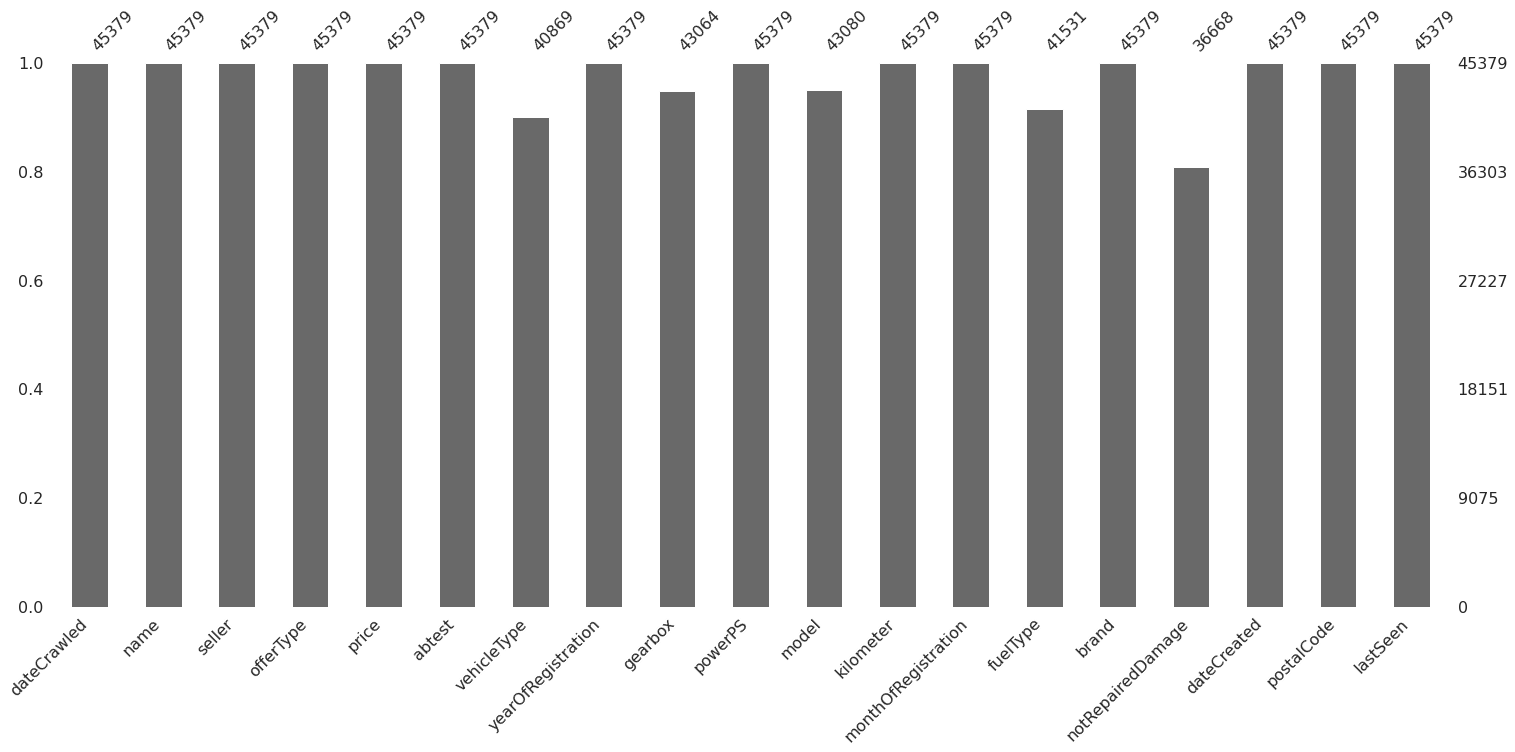

In [ ]:
msno.bar(df)

In [ ]:
df['vehicleType'].value_counts()

limousine        11973
small car        10405
station wagon     8334
bus               3669
cabrio            2548
coupe             1989
suv               1542
others             409
Name: vehicleType, dtype: int64

In [ ]:
df = df[df['vehicleType'].notna()]

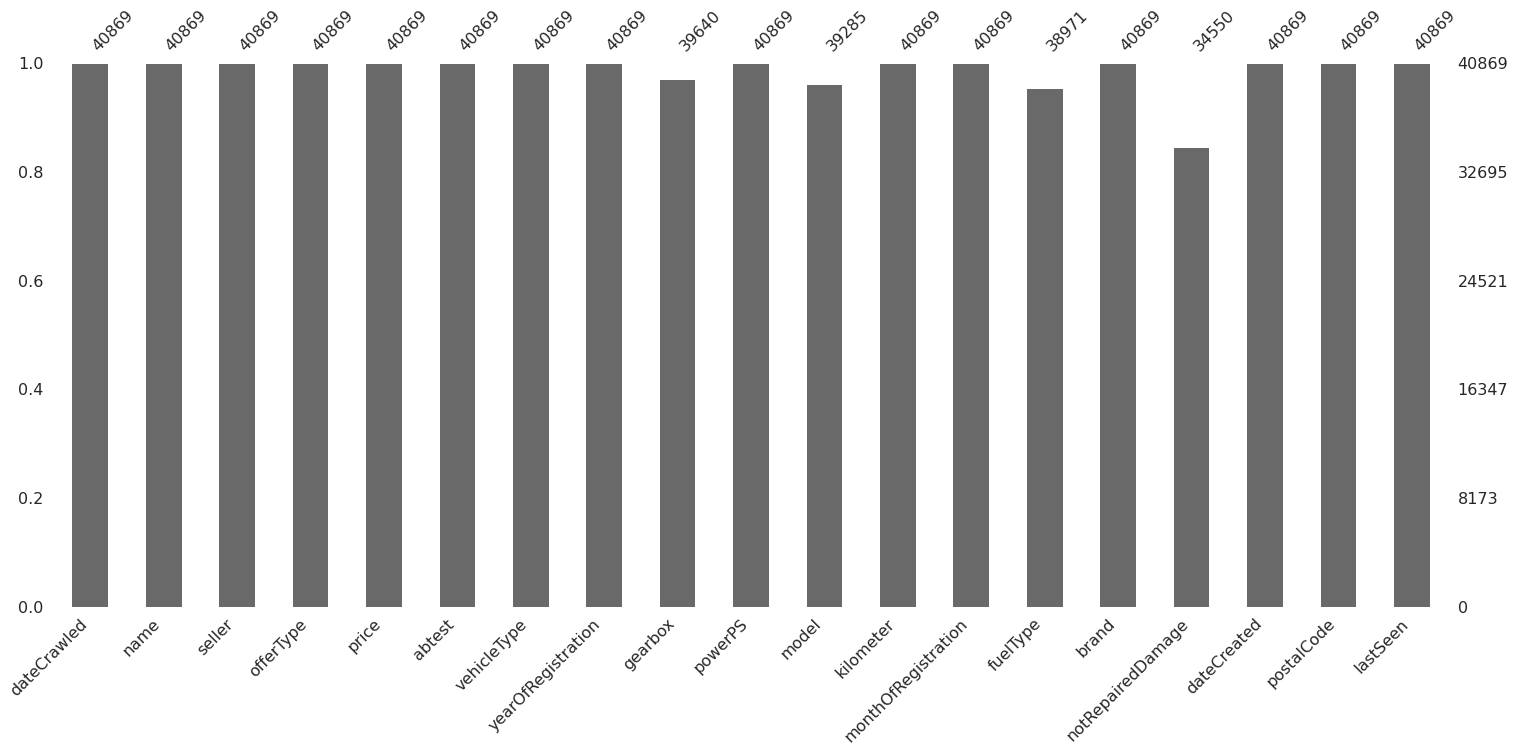

In [ ]:
msno.bar(df)

In [ ]:
df.gearbox.value_counts()

manual       31697
automatic     7943
Name: gearbox, dtype: int64

In [ ]:
df['gearbox'].fillna('manual', inplace = True)

In [ ]:
df.model.value_counts()

golf       3190
others     2813
3er        2471
polo       1489
corsa      1439
           ... 
serie_3       1
b_max         1
samara        1
serie_2       1
charade       1
Name: model, Length: 245, dtype: int64

In [ ]:
df['model'].fillna('golf', inplace = True)

In [ ]:
df.fuelType.value_counts()

petrol     26156
diesel     11980
lpg          702
cng           75
hybrid        29
other         16
electro       13
Name: fuelType, dtype: int64

In [ ]:
df['fuelType'].fillna('petrol', inplace = True)

In [ ]:
df.notRepairedDamage.value_counts()

no     30441
yes     4109
Name: notRepairedDamage, dtype: int64

In [ ]:
df['notRepairedDamage'].fillna('no', inplace = True)

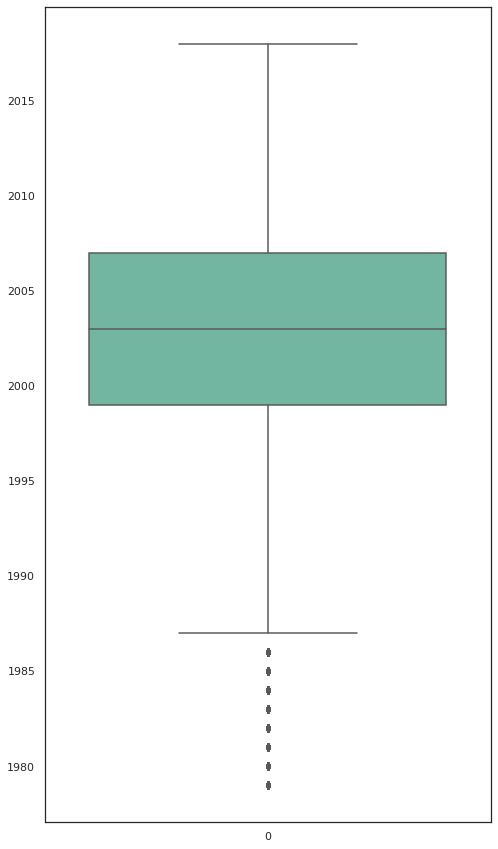

In [ ]:
plt.figure(figsize=(8, 15))
sns.boxplot(data=df.yearOfRegistration[df.yearOfRegistration > 1978], palette='Set2');

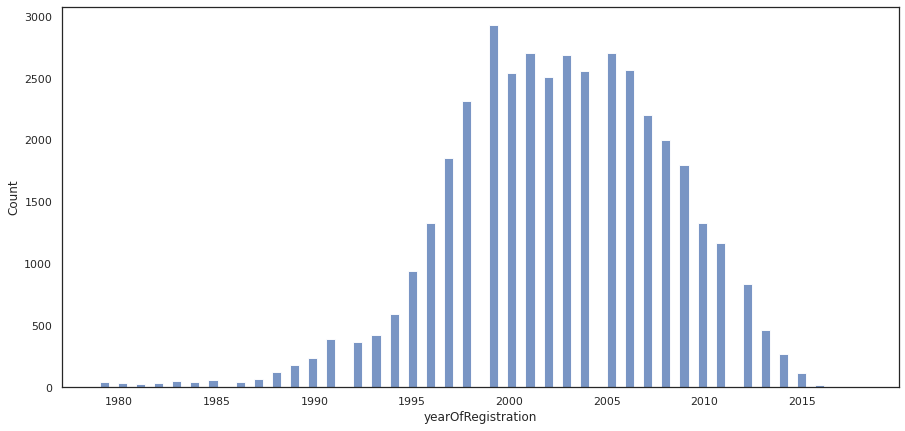

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=df.yearOfRegistration[df.yearOfRegistration > 1978])

In [ ]:
df = df[df.yearOfRegistration > 1978]

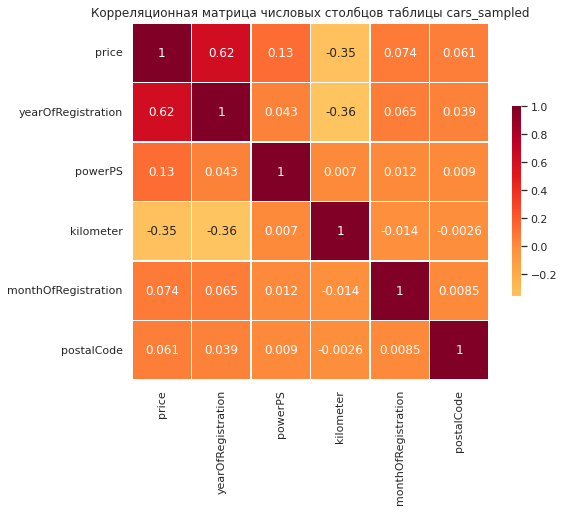

In [ ]:
sns.set_theme(style="white")

corr = df.corr()

fig, ax = plt.subplots(figsize=(8, 7))

sns.heatmap(corr, cmap='YlOrRd', center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})\
            .set_title('Корреляционная матрица числовых столбцов таблицы cars_sampled');

### Сохраните полученный датасет и выведете его.

In [ ]:
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,no,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,no,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2/4/2016 0:00,26826,2/4/2016 12:51


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40558 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          40558 non-null  object
 1   name                 40558 non-null  object
 2   seller               40558 non-null  object
 3   offerType            40558 non-null  object
 4   price                40558 non-null  int64 
 5   abtest               40558 non-null  object
 6   vehicleType          40558 non-null  object
 7   yearOfRegistration   40558 non-null  int64 
 8   gearbox              40558 non-null  object
 9   powerPS              40558 non-null  int64 
 10  model                40558 non-null  object
 11  kilometer            40558 non-null  int64 
 12  monthOfRegistration  40558 non-null  int64 
 13  fuelType             40558 non-null  object
 14  brand                40558 non-null  object
 15  notRepairedDamage    40558 non-null  object
 16  date

### Постройте модель регрессии для цены автомобиля. Обучите ее на данных, полученных из исходного датасета с применением разных методов заполнения пропущенных значений. Сделайте вывод об эффективности разных методов.

In [ ]:
X = df[['seller', 'abtest',	'vehicleType',	'yearOfRegistration',	'gearbox', 'powerPS',	'kilometer', 'monthOfRegistration', 'fuelType',	'brand', 'notRepairedDamage']]
Y = df['price']

NameError: ignored

In [ ]:
X = pd.get_dummies(X)

In [ ]:
df_differences = pd.DataFrame(columns=['Тип регресии', 'Признак(и)', 'Тип выборки', 'The R-squared value', 'RMSE', 'MAE'])
i = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
model = LinearRegression().fit(X_train, y_train)

# Точность для тестируемых данных
print(f'The R-squared value: {r2_score(y_test, model.predict(X_test))}') 
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')
print(f'MAE: {mean_absolute_error(y_test, model.predict(X_test))}')
df_differences.loc[i] = [f'Множественная регрессия', 'Все', 'Train', r2_score(y_train, model.predict(X_train)), 
                           np.sqrt(mean_squared_error(y_train, model.predict(X_train))), mean_absolute_error(y_train, model.predict(X_train))
                          ]
i += 1
df_differences.loc[i] = [f'Множественная регрессия', 'Все', 'Test', r2_score(y_test, model.predict(X_test)), 
                           np.sqrt(mean_squared_error(y_test, model.predict(X_test))), mean_absolute_error(y_test, model.predict(X_test))
                           ]

The R-squared value: 0.6373708459514167
RMSE: 2529.6814046934524
MAE: 1801.1436376534311


In [ ]:
model.coef_

In [ ]:
model.intercept_

-773917.9379175911

In [ ]:
df_differences

,Тип регресии,Признак(и),Тип выборки,The R-squared value,RMSE,MAE
0,Множественная регрессия,Все,Train,0.632061,2557.133358,1816.264962
1,Множественная регрессия,Все,Test,0.637371,2529.681405,1801.143638


In [ ]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

NameError: ignored

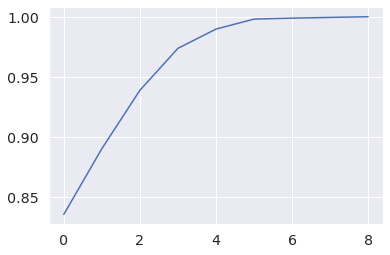

In [ ]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=X_train.shape[1])
X_train_scaled = X_train
pca_test.fit(X_train_scaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.show()

In [ ]:
def best_params(models_names):
    """models_names = ['name1', 'name2', ...]
    names from LinearRegression, RandomForestRegressor, KNeighborsRegressor, SVR only"""

    d = {}

    for model_name in models_names:
        if model_name == 'LinearRegression':
            lin_reg_parameters = {"fit_intercept": [True, False], 'normalize': [True, False]}
            lin_reg_search = GridSearchCV(LinearRegression(), lin_reg_parameters, cv=5)
            lin_reg_search.fit(X_train, y_train)
            d['LinearRegression'] = lin_reg_search.best_params_
            global lin_reg_search_fitted
            lin_reg_search_fitted = lin_reg_search

        elif model_name == 'RandomForestRegressor':
            rf_reg_parameters = {'n_estimators': range(1, 200), 'max_depth': range(1, 30), 'min_samples_split': range(2, 30), 'min_samples_leaf': range(1, 30)}
            rf_reg_search = RandomizedSearchCV(RandomForestRegressor(), rf_reg_parameters, cv=5, n_jobs=-1, random_state=0)
            rf_reg_search.fit(X_train, y_train)
            d['RandomForestRegressor'] = rf_reg_search.best_params_
            global rf_reg_search_fitted
            rf_reg_search_fitted = rf_reg_search

        elif model_name == 'KNeighborsRegressor':
            kn_reg_parameters = {'n_neighbors': range(3, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': range(1, 40)}
            kn_reg_search = GridSearchCV(KNeighborsRegressor(), kn_reg_parameters, cv=5)
            kn_reg_search.fit(X_test, y_test)            
            d['KNeighborsRegressor'] = kn_reg_search.best_params_
            global kn_reg_search_fitted
            kn_reg_search_fitted = kn_reg_search

        elif model_name == 'SVR':
            svr_reg_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
            svr_reg_search = GridSearchCV(SVR(), svr_reg_parameters, cv=5, n_jobs=-1)
            svr_reg_search.fit(X, y)
            d['SVR'] = svr_reg_search.best_params_
            global svr_reg_search_fitted
            svr_reg_search_fitted = svr_reg_search

    return d

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
best_params(['LinearRegression', 'RandomForestRegressor', 'KNeighborsRegressor', 'SVR'])

{'LinearRegression': {'fit_intercept': True, 'normalize': False},
 'RandomForestRegressor': {'n_estimators': 65,
  'min_samples_split': 13,
  'min_samples_leaf': 6,
  'max_depth': 10},
 'KNeighborsRegressor': {'algorithm': 'brute',
  'leaf_size': 1,
  'n_neighbors': 9,
  'weights': 'distance'},
 'SVR': {'kernel': 'linear'}}

Best_regression_model:  RandomForestRegressor 
            LinearRegression  RandomForestRegressor  KNeighborsRegressor  \
r2_score:           0.67222                0.72438             0.647593   

                SVR  
r2_score:  0.666399  


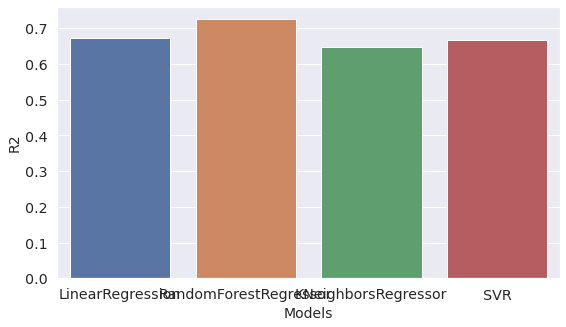

In [ ]:
def best_model(X_train, y_train, X_test, y_test):
    import re
    models = [LinearRegression(fit_intercept=True, normalize=True, n_jobs=-1),
              RandomForestRegressor(n_estimators=65, min_samples_split=13, min_samples_leaf=6, max_depth=10, n_jobs=-1, random_state=0),
              KNeighborsRegressor(algorithm='auto', leaf_size=21, n_neighbors=5, weights='distance', n_jobs=-1),
              SVR(kernel='linear')]
    d = {}
    for model in models:
        model.fit(X_train, y_train)
        model_name = re.match(r'\w+', str(model)).group()
        d[model_name] = r2_score(y_test, model.predict(X_test))
    mdf = pd.DataFrame(d, index=['r2_score:'])
    
    plt.figure(figsize=(9,5))
    bp = sns.barplot(x=mdf.columns, y=mdf.values.flatten())
    bp.set_xlabel("Models", fontsize=14)
    bp.set_ylabel("R2", fontsize=14)

    best_regression_model = mdf.idxmax(axis=1)[0]
    return ('Best_regression_model: ', best_regression_model, '\n', mdf)
    
print(*best_model(X_train, y_train, X_test, y_test))